In [1]:
####  Task 1:
#### 1.1 - Import libraries. Create and explore a dataset.
import pandas as pd
import matplotlib.pyplot as plt

# Create a simple movie dataset
data = {
    'Year': [2018, 2018, 2018, 2019, 2019, 2019, 2020, 2020, 2020],
    'Genre': ['Action', 'Comedy', 'Drama', 'Action', 'Comedy', 'Drama', 'Action', 'Comedy', 'Drama'],
    'Number_of_Movies': [10, 15, 8, 12, 18, 6, 11, 14, 9]
}

movies_df = pd.DataFrame(data)
print(movies_df)

   Year   Genre  Number_of_Movies
0  2018  Action                10
1  2018  Comedy                15
2  2018   Drama                 8
3  2019  Action                12
4  2019  Comedy                18
5  2019   Drama                 6
6  2020  Action                11
7  2020  Comedy                14
8  2020   Drama                 9


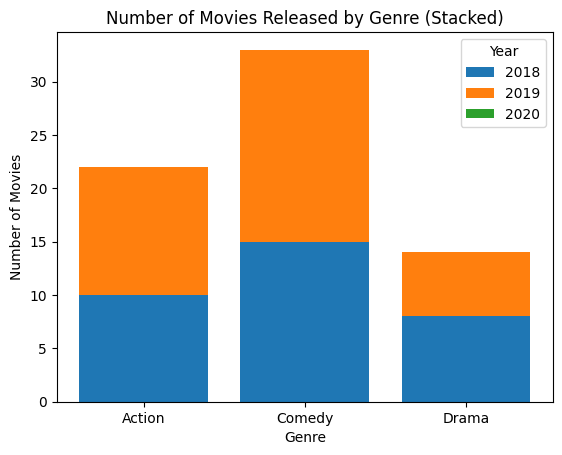

In [2]:
#### 1.2 - Stacked bar chart: Using a stacked bar chart, visualize the distribution of movies released in different genres over the years,
#### showing the total number of movies released each year.
# Stacked bar chart
genres = movies_df['Genre'].unique()
years = movies_df['Year'].unique()

bar_width = 0.5
bottom = None

for year in years:
    year_data = movies_df[movies_df['Year'] == year]
    bar = plt.bar(year_data['Genre'], year_data['Number_of_Movies'], label=str(year), bottom=bottom)

    if bottom is None:
        bottom = year_data['Number_of_Movies']
    else:
        bottom += year_data['Number_of_Movies']

plt.title('Number of Movies Released by Genre (Stacked)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.legend(title='Year',labels=years)
plt.show()

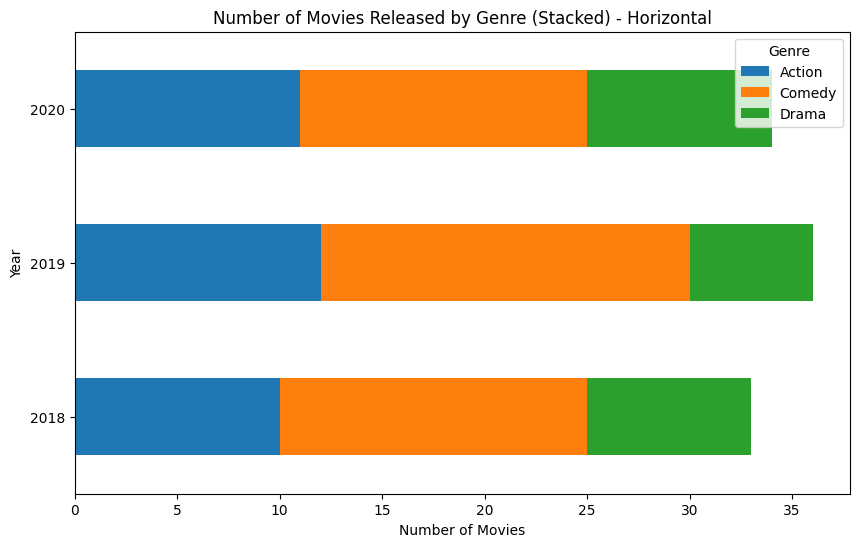

In [ ]:
#### 1.3 - Using the dataframe.plot(kind=’barh’), create a horizontal stacked bar
## chart showing the number of movies released per genre for each year.
# Pivot the DataFrame for stacked bar chart
pivot_df = movies_df.pivot(index='Year', columns='Genre', values='Number_of_Movies')

# Plotting
pivot_df.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Number of Movies Released by Genre (Stacked) - Horizontal')
plt.xlabel('Number of Movies')
plt.ylabel('Year')
plt.legend(title='Genre')
plt.show()

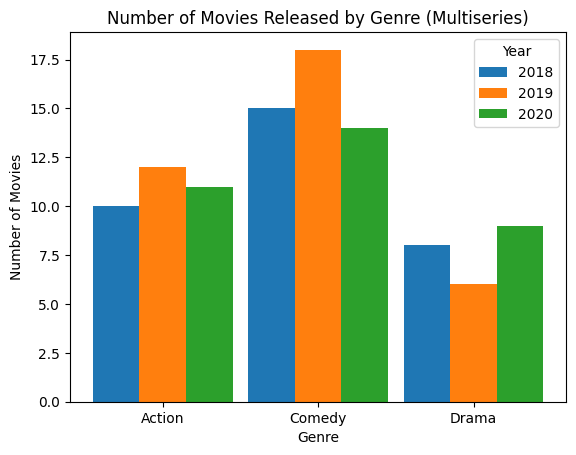

In [ ]:
#### 1.4 - Multiseries bar chart: Create a multiseries bar chart
###### Compare the number of movies released in different genres for a specific year.
# Multiseries bar chart
bar_width = 0.3
index = range(len(genres))

for i, year in enumerate(years):
    year_data = movies_df[movies_df['Year'] == year]
    plt.bar([x + i * bar_width for x in index], year_data['Number_of_Movies'], bar_width, label=year)

plt.title('Number of Movies Released by Genre (Multiseries)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks([x + bar_width * (len(years) - 1) / 2 for x in index], genres)
plt.legend(title='Year',labels=years)
plt.show()

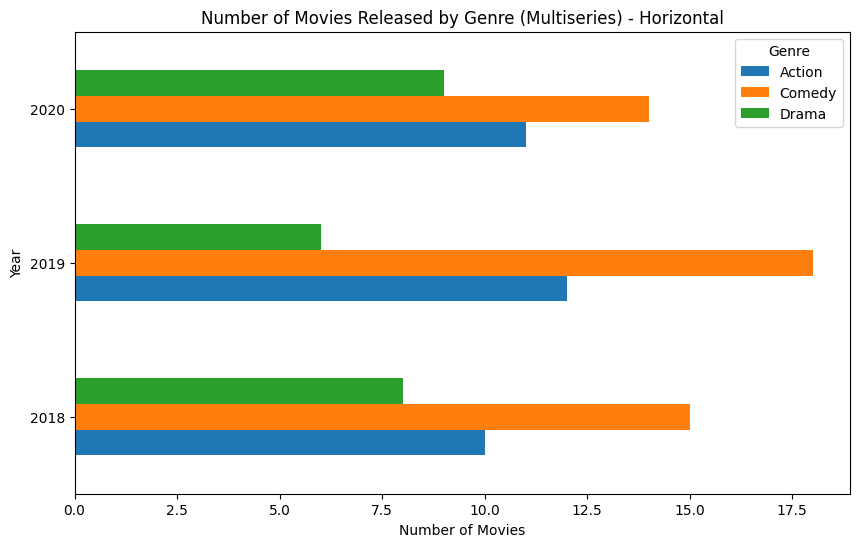

In [ ]:
##### 1.5 - Using the dataframe.plot(kind=’barh’),
#### create a horizontal multiseries bar chart displaying the number of movies released per genre for each year.
# Pivot the DataFrame for multiseries bar chart
pivot_df = movies_df.pivot(index='Year', columns='Genre', values='Number_of_Movies')

# Plotting
pivot_df.plot(kind='barh', figsize=(10, 6))
plt.title('Number of Movies Released by Genre (Multiseries) - Horizontal')
plt.xlabel('Number of Movies')
plt.ylabel('Year')
plt.legend(title='Genre')
plt.show()

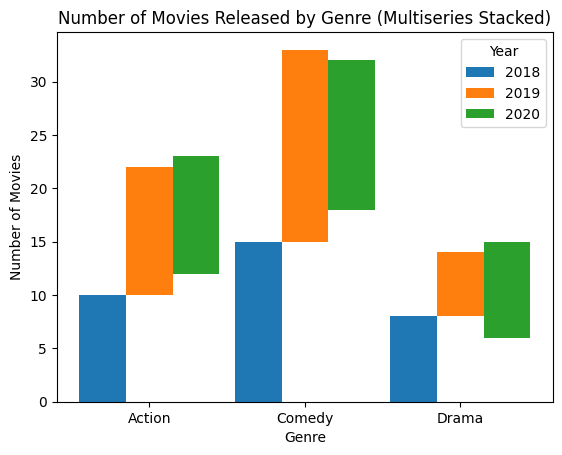

In [ ]:
#### 1.6 - Multiseries Stacked Bar Chart: Create a multiseries bar chart comparing the number of movies released in different genres over the years,
######     showing the distribution for each genre stacked over the years.

# Multiseries stacked bar chart
bar_width = 0.3
index = range(len(genres))

for i, year in enumerate(years):
    year_data = movies_df[movies_df['Year'] == year]
    if i == 0:
        bottoms = None
    else:
        bottoms = movies_df[movies_df['Year'] == years[i - 1]]['Number_of_Movies']

    plt.bar([x + i * bar_width for x in index], year_data['Number_of_Movies'], bar_width, label=year, bottom=bottoms)

plt.title('Number of Movies Released by Genre (Multiseries Stacked)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks([x + bar_width * (len(years) - 1) / 2 for x in index], genres)
plt.legend(title='Year',labels=years)
plt.show()

In [ ]:
#### - Task 2: PART A: Using the whole dataset.
#### 1- Download winequality_red.csv and save it to your preferred file location

##### 2 - Import libraries. Load and explore the dataset.
import pandas as pd
import matplotlib.pyplot as plt

# Load Wine quality (red) dataset
wine_quality = pd.read_csv("winequality_red.csv")

# Display the first few rows of the dataset
print(wine_quality.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

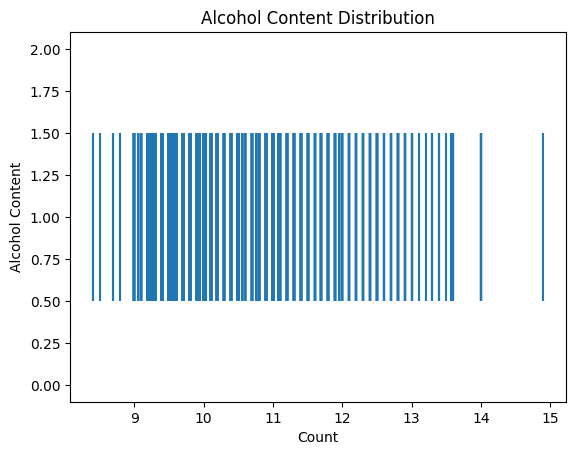

In [ ]:
##### 3 - Event plot: Create an event plot by representing alcohol content as events.
# Event plot
plt.eventplot(wine_quality['alcohol'], orientation='horizontal')
plt.title('Alcohol Content Distribution')
plt.xlabel('Count')
plt.ylabel('Alcohol Content')
plt.show()

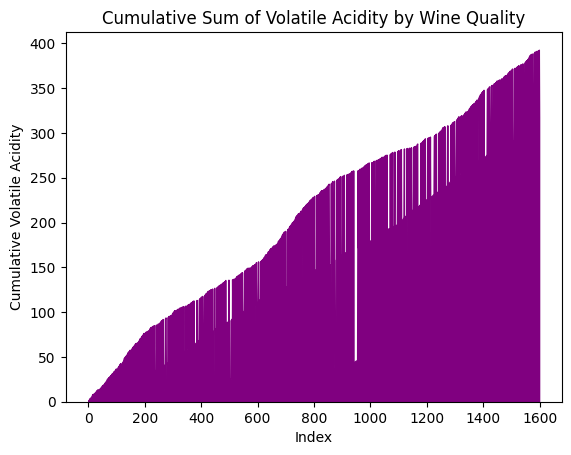

In [ ]:
##### 4 - Stack plot: Create a stack plot showing the evolution of a quantity over time by using
#####     cumulative sum of volatile acidity for each wine quality.
# Stack plot
volatile_acidity_cumsum = wine_quality.groupby('quality')['volatile acidity'].cumsum()
plt.stackplot(wine_quality.index, volatile_acidity_cumsum, color='purple')
plt.title('Cumulative Sum of Volatile Acidity by Wine Quality')
plt.xlabel('Index')
plt.ylabel('Cumulative Volatile Acidity')
plt.show()

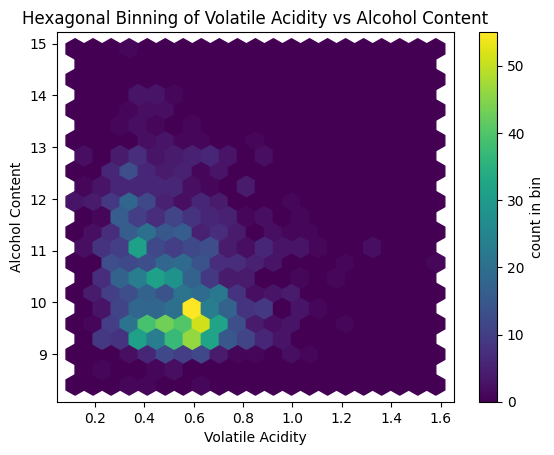

In [ ]:
#### 5 - Hexagonal binning plot: Create a hexagonal binning plot visualizing the relationship between two variables,
#### volatile acidity and alcohol content.
# Hexagonal Binning plot
plt.hexbin(wine_quality['volatile acidity'], wine_quality['alcohol'], gridsize=20)
plt.title('Hexagonal Binning of Volatile Acidity vs Alcohol Content')
plt.xlabel('Volatile Acidity')
plt.ylabel('Alcohol Content')
plt.colorbar(label='count in bin')
plt.show()

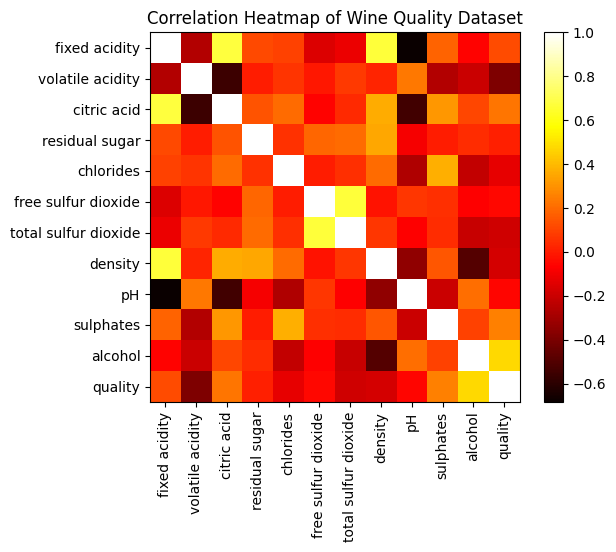

In [ ]:
#### 6 - Heatmap: Create a heatmap showing the correlation between different features in wine quality.
# Heatmap
plt.imshow(wine_quality.corr(), cmap='hot', interpolation='nearest')
plt.title('Correlation Heatmap of Wine Quality Dataset')
plt.colorbar()
plt.xticks(range(len(wine_quality.columns)), wine_quality.columns, rotation=90)
plt.yticks(range(len(wine_quality.columns)), wine_quality.columns)
plt.show()

In [ ]:
##### PART B: 7 - Using a sample of the dataset. Load a small segment of the Wine Quality Red dataset by using the sample function.
import numpy as np

# Take a small sample of the dataset
sample_data = wine_quality.sample(n=50)

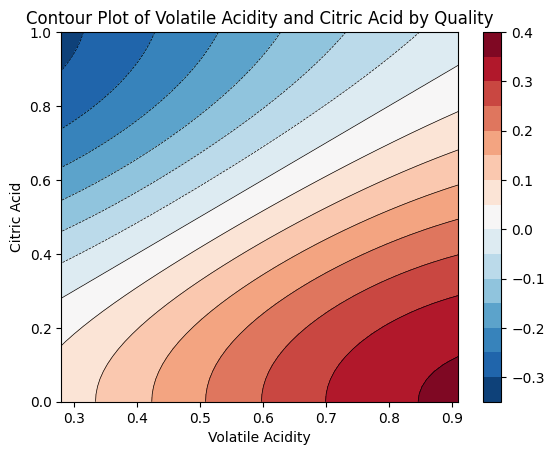

In [ ]:
#### 8 - Contour plot: Create a mesh grid for grid values and create a contour plot to visualize
##### the relationship between volatile acidity, citric acid, and wine quality using a 2D grid.
# Generate 2D grid for contour plot
x = sample_data['volatile acidity']
y = sample_data['citric acid']
z = sample_data['quality']

# Create grid values first
xi, yi = np.meshgrid(np.linspace(x.min(), x.max(), 50), np.linspace(y.min(), y.max(), 50))
zi = (xi**2 - yi**2) * np.exp(-xi**2 - yi**2)  # Example function

plt.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
contour = plt.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
plt.colorbar(contour)
plt.title('Contour Plot of Volatile Acidity and Citric Acid by Quality')
plt.xlabel('Volatile Acidity')
plt.ylabel('Citric Acid')
plt.show()

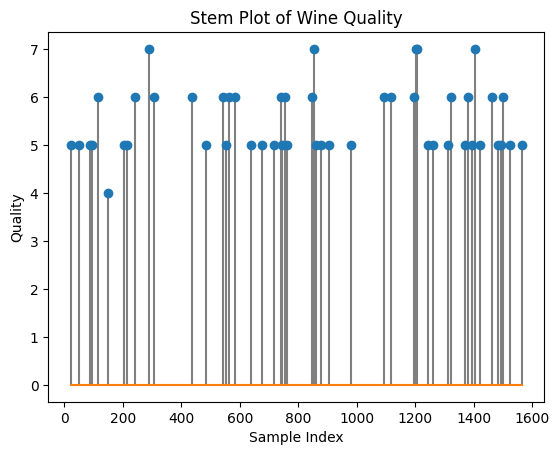

In [ ]:
#### 9 - Stem plot: Create a stem plot to visualize the quality of wine samples.
# Stem plot
x = sample_data.index
y = sample_data['quality']

plt.stem(x, y, linefmt='grey', markerfmt='C0o', basefmt='C1-')
plt.title('Stem Plot of Wine Quality')
plt.xlabel('Sample Index')
plt.ylabel('Quality')
plt.show()

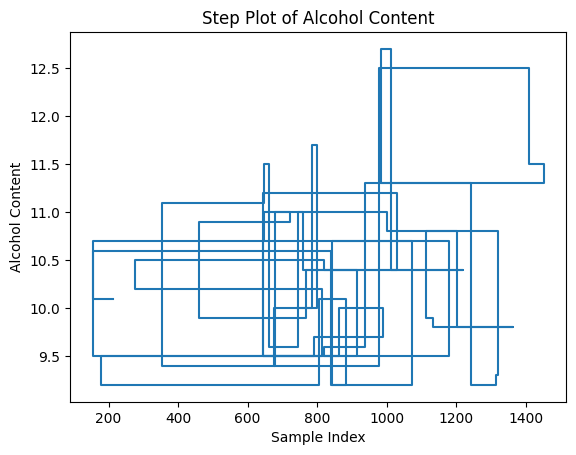

In [ ]:
##### 10 - Step Plot: Create a step plot to visualize the alcohol content of wine samples.
# Step plot
x = sample_data.index
y = sample_data['alcohol']

plt.step(x, y, where='mid')
plt.title('Step Plot of Alcohol Content')
plt.xlabel('Sample Index')
plt.ylabel('Alcohol Content')
plt.show()

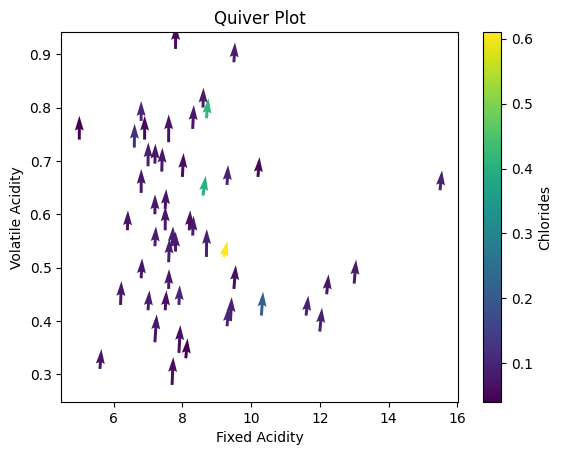

In [ ]:
##### 11 - Quiver Plot: Create a quiver plot to visualize the relationship between fixed acidity, volatile acidity, citric acid, quality, and chlorides.
# Quiver plot
x = sample_data['fixed acidity']
y = sample_data['volatile acidity']
u = sample_data['citric acid']
v = sample_data['quality']
c = sample_data['chlorides']

plt.quiver(x, y, u, v, c)
plt.title('Quiver Plot')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.colorbar(label='Chlorides')
plt.show()

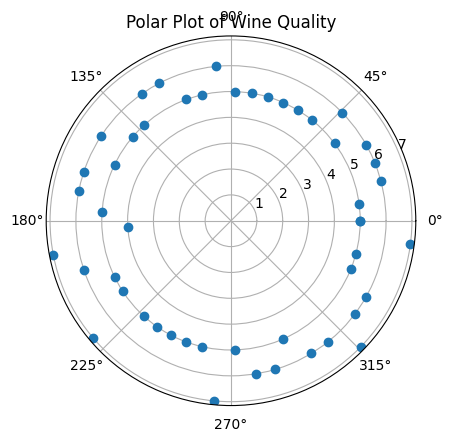

In [ ]:
##### 12 - Polar Plot: Create a polar plot to visualize the quality of wine samples in a circular coordinate system.
# Polar plot
theta = np.linspace(0, 2*np.pi, len(sample_data))
r = sample_data['quality']

plt.polar(theta, r, 'o')
plt.title('Polar Plot of Wine Quality')
plt.show()

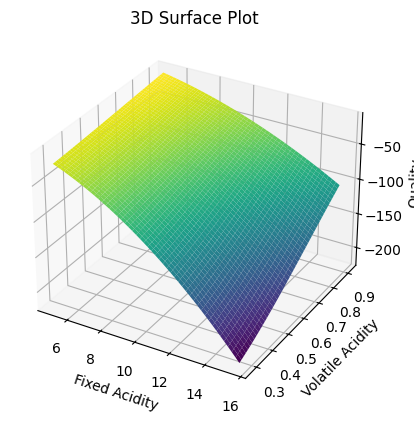

In [ ]:
#### 13 - 3D Surface Plot: Create a mesh grid for grid values and create a
###### 3D surface plot to visualize the relationship between fixed acidity, volatile acidity, and wine quality.

from mpl_toolkits.mplot3d import Axes3D

# 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = sample_data['fixed acidity']
y = sample_data['volatile acidity']
z = sample_data['quality']

# Create grid values first
xi, yi = np.meshgrid(np.linspace(x.min(), x.max(), 50), np.linspace(y.min(), y.max(), 50))
zi = (yi**2 - xi**2) / np.exp(yi**2)  # Example function

ax.plot_surface(xi, yi, zi, cmap='viridis')
ax.set_title('3D Surface Plot')
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
ax.set_zlabel('Quality')

plt.show()